<a href="https://colab.research.google.com/github/muhammadaryadwisaputra/Bengkel-Coding/blob/main/Uas(BK)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagian Baru

# Prosesing data



In [5]:
# Cek missing values
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

# Cek duplikasi
print("\nJumlah Data Duplikat:", df.duplicated().sum())

# Hapus duplikasi (jika ada)
df = df.drop_duplicates()


Jumlah Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah Data Duplikat: 18


In [7]:
numerik_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerik_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float

# Drop rows dengan NaN (jika muncul akibat konversi)
df.dropna(inplace=True)

In [8]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Terapkan pada beberapa kolom penting
for col in ['Age', 'Height', 'Weight']:
    df = remove_outliers_iqr(df, col)

In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
from imblearn.over_sampling import SMOTE

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


In [15]:
X_final = pd.DataFrame(X_scaled, columns=X.columns)
y_final = y_resampled.reset_index(drop=True)

print("Shape data akhir (fitur):", X_final.shape)
print("Distribusi target setelah SMOTE:\n", y_final.value_counts())

Shape data akhir (fitur): (1953, 16)
Distribusi target setelah SMOTE:
 NObeyesdad
1    279
5    279
6    279
2    279
0    279
3    279
4    279
Name: count, dtype: int64


Kesimpulan Preprocessing
Missing values dan data duplikat telah ditangani.

Outlier telah diatasi dengan metode IQR (misalnya pada 'Weight').

Semua fitur kategorikal telah dikonversi menjadi numerik.

Seluruh fitur masih digunakan, bisa difilter lebih lanjut pada tahap modeling.

Ketidakseimbangan kelas target telah diatasi menggunakan SMOTE.

Fitur numerik telah distandardisasi menggunakan StandardScaler.

# Exploratory Data Analysis

In [2]:
# 1. Mount Google Drive (jalankan ini dulu)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


5 Baris Pertama Dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_W

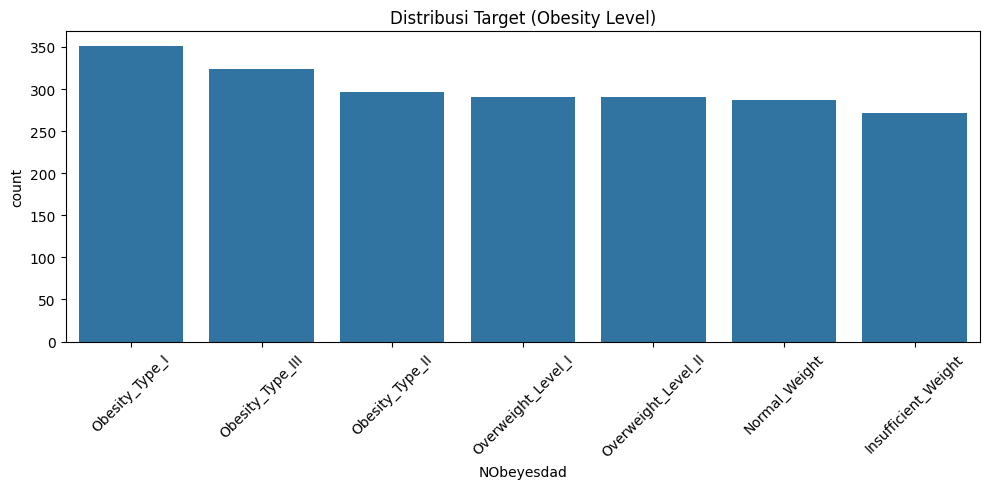

In [3]:
# 2. Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Load dataset (ganti path ini dengan yang benar sesuai lokasi file di Drive kamu)
df = pd.read_csv('/content/drive/MyDrive/DataBK/ObesityDataSet.csv')

# 4 Tampilkan beberapa baris pertama
print("5 Baris Pertama Dataset:")
print(df.head())

# 5. Informasi Umum Dataset
print("\nInformasi Dataset:")
print(df.info())

print("\nDeskripsi Statistik:")
print(df.describe(include='all'))

# 6. Cek Missing Values
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

# 7. Cek Unique Values
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())

# 8. Cek Duplikasi
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())

# 9. Visualisasi Distribusi Target
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribusi Target (Obesity Level)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




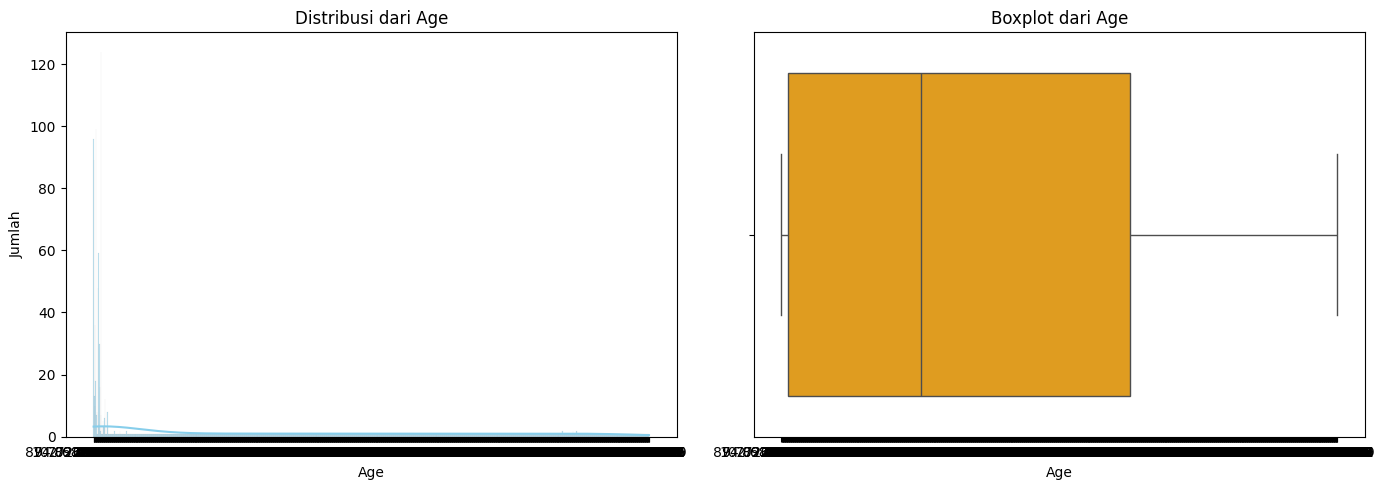

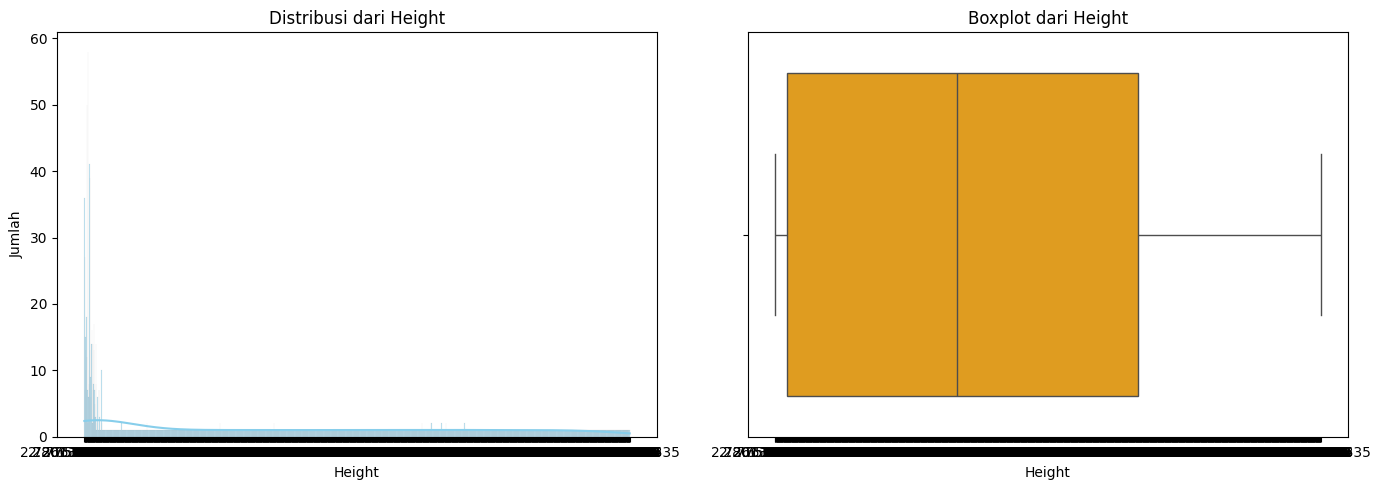

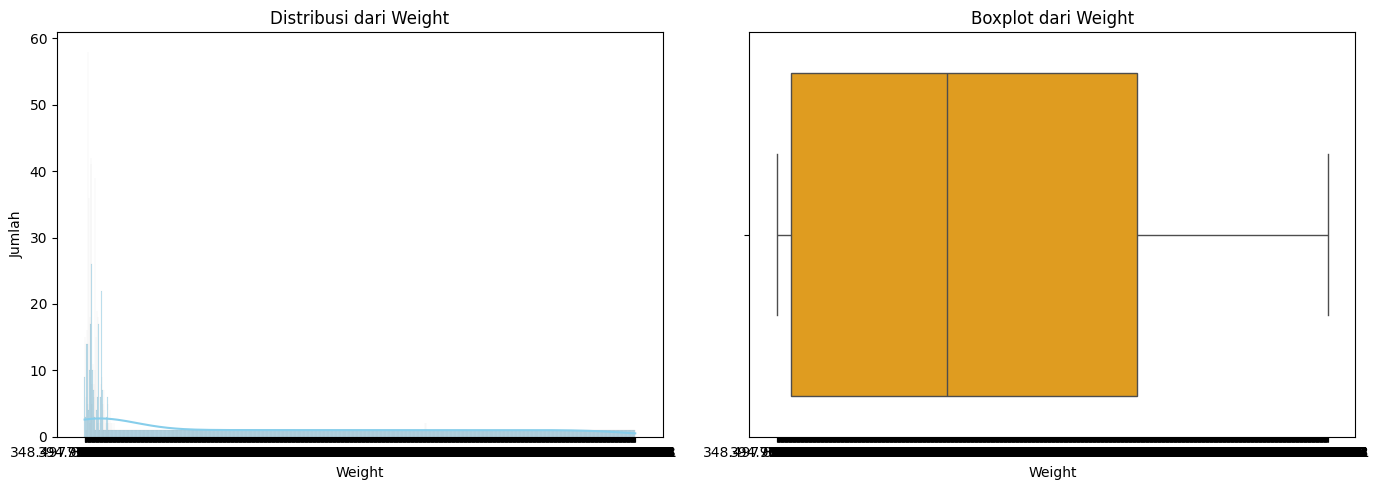

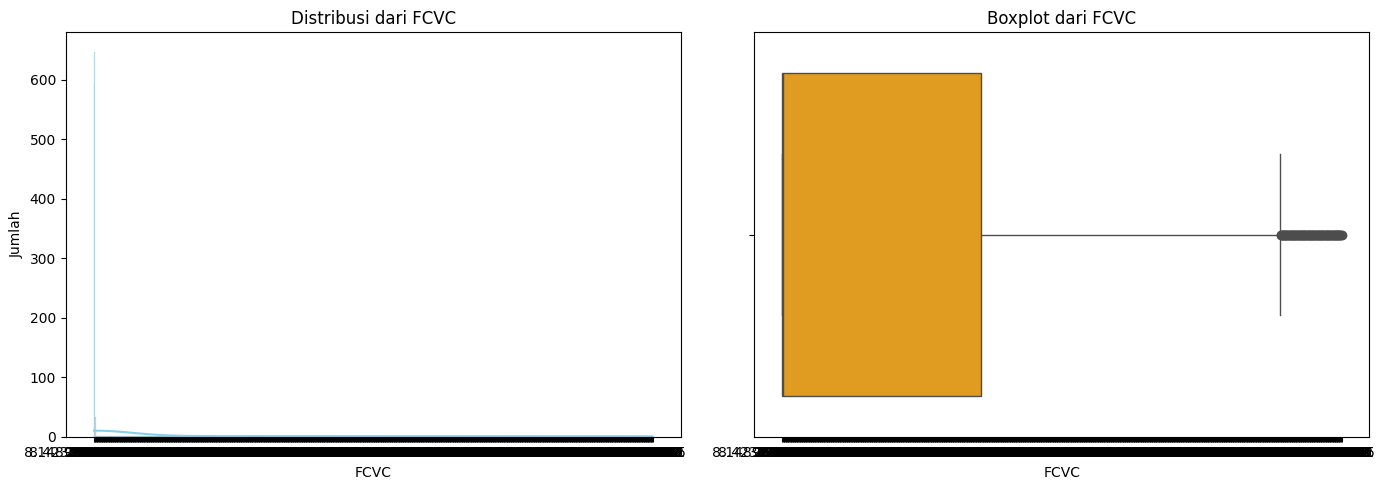

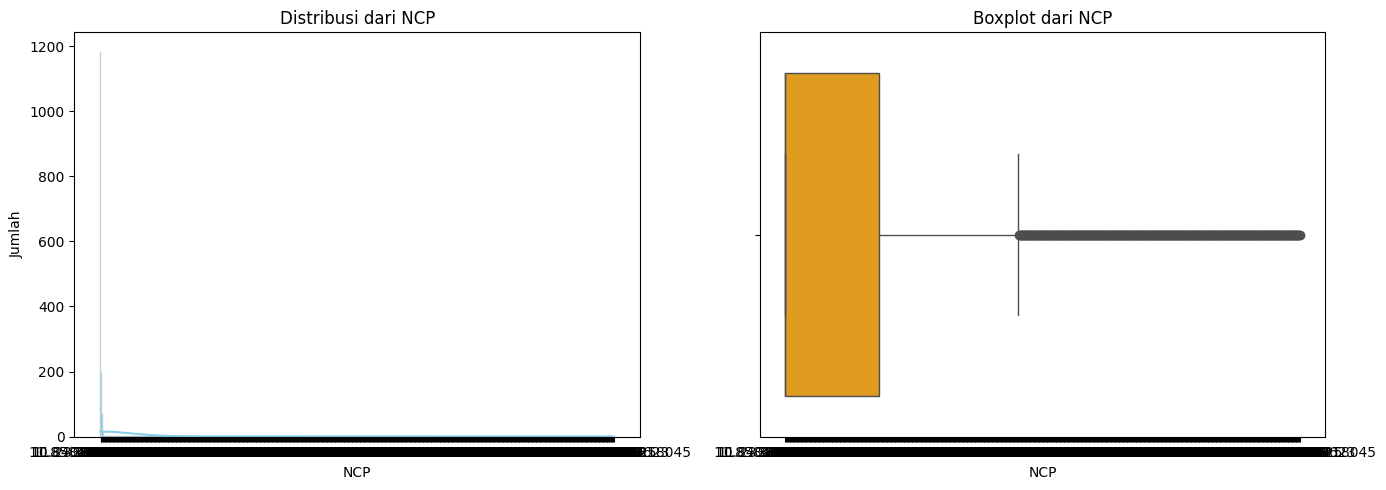

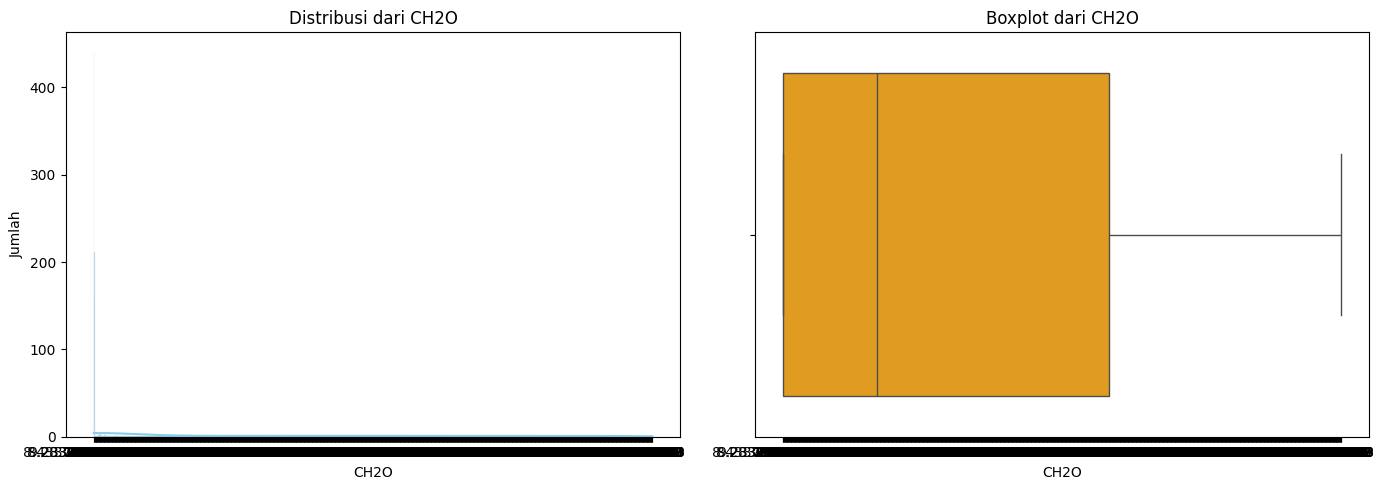

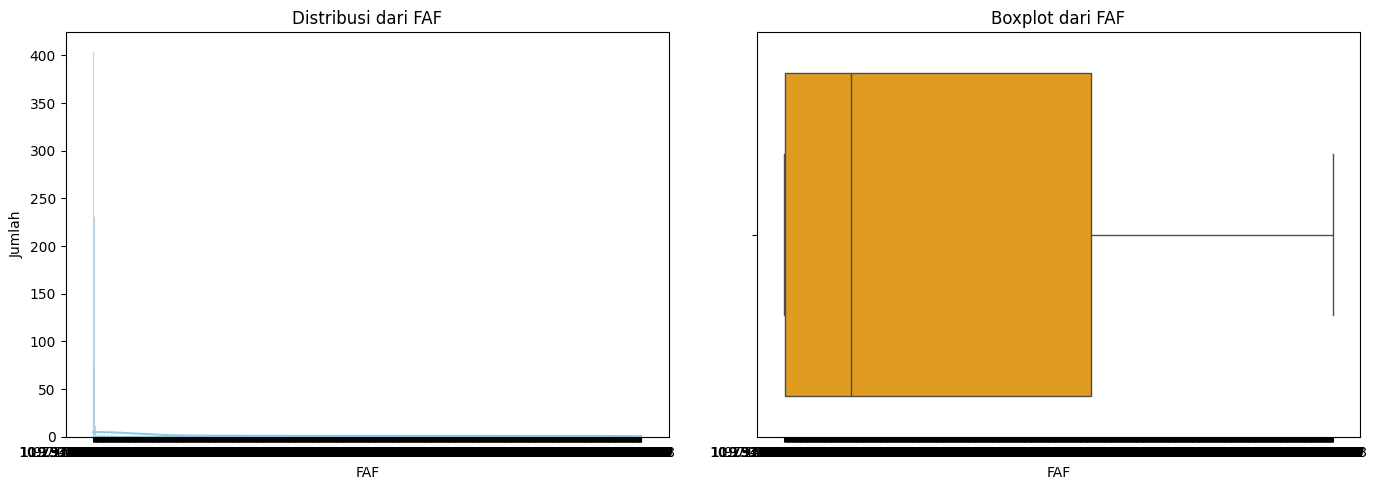

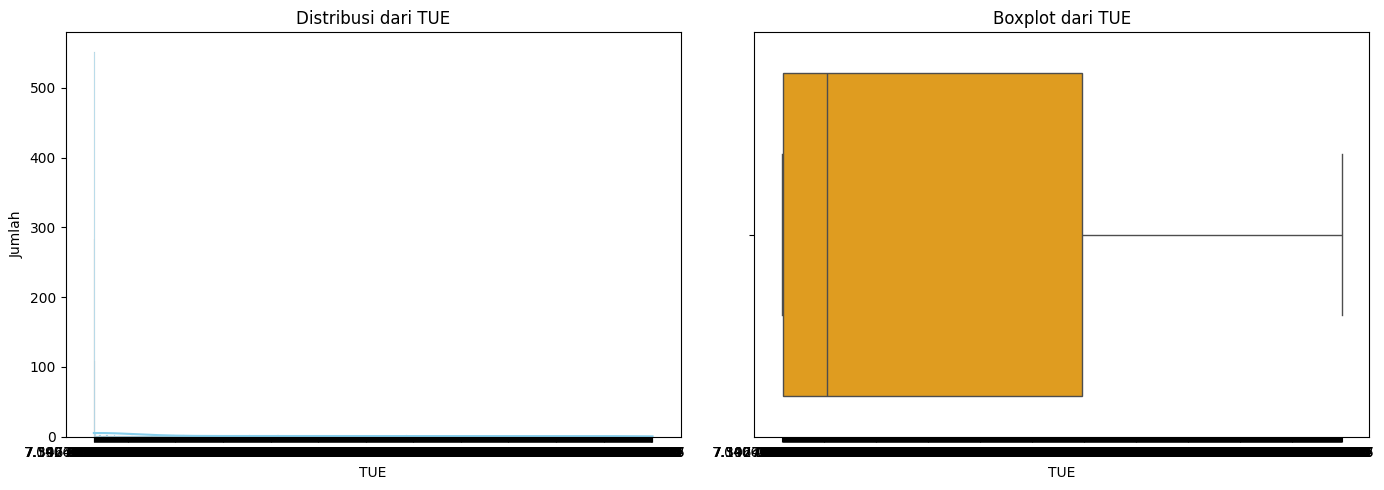

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar fitur numerik
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Loop untuk setiap fitur
for feature in numerical_features:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribusi dari {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Jumlah')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color='orange')
    plt.title(f'Boxplot dari {feature}', fontsize=12)
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()
